In [1]:
from typing import List
from contextlib import ExitStack

In [2]:
import networkx as nx
import torch
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as stats
import numpy as np
from sklearn.model_selection import train_test_split
from app_tunnel import mlflow_tunnel
import mlflow

In [3]:
from biological_fuzzy_logic_networks.utils import read_sif
from biological_fuzzy_logic_networks.DREAM.DREAMBioFuzzNet import DREAMBioFuzzNet
from biological_fuzzy_logic_networks.label_shuffle import create_shuffled_subclass

In [4]:
es = ExitStack()
tunnel = es.enter_context(mlflow_tunnel("mlflow"))


mlflow.set_tracking_uri(f"http://localhost:{tunnel[5000]}")
mlflow.set_experiment("LiverDREAM_shuffling")

<Experiment: artifact_location='s3://mlflow/90', creation_time=1700834484829, experiment_id='90', last_update_time=1700834484829, lifecycle_stage='active', name='LiverDREAM_shuffling', tags={}>

In [5]:
nodes, edges = read_sif("../network/synth/LiverDREAM_PKN.sif")

In [6]:
df = pd.read_csv("../network/synth/LiverDREAM_PKN_teacher_values.csv",index_col=0)

In [7]:
def format_data_dicts(data_df: pd.DataFrame, input_nodes: List[str], value_nodes: List[str], prefix=''):
    input_df = data_df[input_nodes]
    value_df = data_df[value_nodes]
    input_dict = {k:torch.tensor(v.values) for k,v in input_df.to_dict(orient='series').items()}
    value_dict = {k:torch.tensor(v.values) for k,v in value_df.to_dict(orient='series').items()}
    inhibitor_dict = {k: torch.ones_like(v) for k,v in value_dict.items()}
    return {
        f'{prefix}input': input_dict,
        f'{prefix}ground_truth': value_dict,
        f'{prefix or "train_"}inhibitors': inhibitor_dict
    }

In [8]:
def prepare_data(data_df:pd.DataFrame, input_nodes: List[str], value_nodes: List[str]):
    train_df, test_df = train_test_split(data_df, train_size=0.9)
    train_df, valid_df = train_test_split(train_df, train_size=0.8)
    return dict(
        **format_data_dicts(train_df, input_nodes, value_nodes, prefix=''),
        **format_data_dicts(valid_df, input_nodes, value_nodes, prefix='valid_'),
        **format_data_dicts(test_df, input_nodes, value_nodes, prefix='test_'),
    )

In [9]:
bfn = DREAMBioFuzzNet(nodes=nodes, edges=edges)
input_nodes = bfn.root_nodes
value_nodes = bfn.biological_nodes

In [10]:
data_dicts = prepare_data(df, input_nodes, value_nodes)

In [11]:
optim_data = {k:v for k,v in data_dicts.items() if 'test' not in k}

In [13]:
nrep=10

In [17]:
for i in range(nrep):
    mlflow.start_run()
    mlflow.log_param("version","normal")
    bfn = DREAMBioFuzzNet(nodes=nodes, edges=edges)
    out_data = bfn.conduct_optimisation(
        epochs=10,
        batch_size=64,
        learning_rate=0.01,
        logger=mlflow,
        **optim_data
    )
    mlflow.end_run()

Loss=?.??e??:   0%|          | 0/10 [00:00<?, ?it/s]

batch:   0%|          | 0/56 [00:00<?, ?it/s]

batch:   0%|          | 0/56 [00:00<?, ?it/s]

batch:   0%|          | 0/56 [00:00<?, ?it/s]

batch:   0%|          | 0/56 [00:00<?, ?it/s]

batch:   0%|          | 0/56 [00:00<?, ?it/s]

batch:   0%|          | 0/56 [00:00<?, ?it/s]

batch:   0%|          | 0/56 [00:00<?, ?it/s]

batch:   0%|          | 0/56 [00:00<?, ?it/s]

batch:   0%|          | 0/56 [00:00<?, ?it/s]

batch:   0%|          | 0/56 [00:00<?, ?it/s]

Loss=?.??e??:   0%|          | 0/10 [00:00<?, ?it/s]

batch:   0%|          | 0/56 [00:00<?, ?it/s]

batch:   0%|          | 0/56 [00:00<?, ?it/s]

batch:   0%|          | 0/56 [00:00<?, ?it/s]

batch:   0%|          | 0/56 [00:00<?, ?it/s]

batch:   0%|          | 0/56 [00:00<?, ?it/s]

batch:   0%|          | 0/56 [00:00<?, ?it/s]

batch:   0%|          | 0/56 [00:00<?, ?it/s]

batch:   0%|          | 0/56 [00:00<?, ?it/s]

batch:   0%|          | 0/56 [00:00<?, ?it/s]

batch:   0%|          | 0/56 [00:00<?, ?it/s]

Loss=?.??e??:   0%|          | 0/10 [00:00<?, ?it/s]

batch:   0%|          | 0/56 [00:00<?, ?it/s]

batch:   0%|          | 0/56 [00:00<?, ?it/s]

batch:   0%|          | 0/56 [00:00<?, ?it/s]

batch:   0%|          | 0/56 [00:00<?, ?it/s]

batch:   0%|          | 0/56 [00:00<?, ?it/s]

batch:   0%|          | 0/56 [00:00<?, ?it/s]

batch:   0%|          | 0/56 [00:00<?, ?it/s]

batch:   0%|          | 0/56 [00:00<?, ?it/s]

batch:   0%|          | 0/56 [00:00<?, ?it/s]

batch:   0%|          | 0/56 [00:00<?, ?it/s]

Loss=?.??e??:   0%|          | 0/10 [00:00<?, ?it/s]

batch:   0%|          | 0/56 [00:00<?, ?it/s]

batch:   0%|          | 0/56 [00:00<?, ?it/s]

batch:   0%|          | 0/56 [00:00<?, ?it/s]

batch:   0%|          | 0/56 [00:00<?, ?it/s]

batch:   0%|          | 0/56 [00:00<?, ?it/s]

batch:   0%|          | 0/56 [00:00<?, ?it/s]

batch:   0%|          | 0/56 [00:00<?, ?it/s]

batch:   0%|          | 0/56 [00:00<?, ?it/s]

batch:   0%|          | 0/56 [00:00<?, ?it/s]

batch:   0%|          | 0/56 [00:00<?, ?it/s]

Loss=?.??e??:   0%|          | 0/10 [00:00<?, ?it/s]

batch:   0%|          | 0/56 [00:00<?, ?it/s]

batch:   0%|          | 0/56 [00:00<?, ?it/s]

batch:   0%|          | 0/56 [00:00<?, ?it/s]

batch:   0%|          | 0/56 [00:00<?, ?it/s]

batch:   0%|          | 0/56 [00:00<?, ?it/s]

batch:   0%|          | 0/56 [00:00<?, ?it/s]

batch:   0%|          | 0/56 [00:00<?, ?it/s]

batch:   0%|          | 0/56 [00:00<?, ?it/s]

batch:   0%|          | 0/56 [00:00<?, ?it/s]

batch:   0%|          | 0/56 [00:00<?, ?it/s]

Loss=?.??e??:   0%|          | 0/10 [00:00<?, ?it/s]

batch:   0%|          | 0/56 [00:00<?, ?it/s]

batch:   0%|          | 0/56 [00:00<?, ?it/s]

batch:   0%|          | 0/56 [00:00<?, ?it/s]

batch:   0%|          | 0/56 [00:00<?, ?it/s]

batch:   0%|          | 0/56 [00:00<?, ?it/s]

batch:   0%|          | 0/56 [00:00<?, ?it/s]

Loss=?.??e??:   0%|          | 0/10 [00:00<?, ?it/s]

batch:   0%|          | 0/56 [00:00<?, ?it/s]

batch:   0%|          | 0/56 [00:00<?, ?it/s]

batch:   0%|          | 0/56 [00:00<?, ?it/s]

batch:   0%|          | 0/56 [00:00<?, ?it/s]

batch:   0%|          | 0/56 [00:00<?, ?it/s]

batch:   0%|          | 0/56 [00:00<?, ?it/s]

batch:   0%|          | 0/56 [00:00<?, ?it/s]

batch:   0%|          | 0/56 [00:00<?, ?it/s]

batch:   0%|          | 0/56 [00:00<?, ?it/s]

IOPub message rate exceeded.
The Jupyter server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--ServerApp.iopub_msg_rate_limit`.

Current values:
ServerApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
ServerApp.rate_limit_window=3.0 (secs)



In [18]:
loss_df = out_data[0]

In [19]:
test_gt = data_dicts['test_ground_truth']
test_inh = data_dicts['test_inhibitors']

In [20]:
n_test = len(test_gt['mek12'])

In [21]:
with torch.no_grad():
    bfn.initialise_random_truth_and_output(n_test)
    bfn.set_network_ground_truth(test_gt)
    bfn.sequential_update(input_nodes=bfn.root_nodes, inhibition=test_inh)

In [22]:
data = {}
for n in bfn.biological_nodes:
    if n not in bfn.root_nodes:
        data[f"{n}_pred"]=bfn.nodes[n]['output_state'].numpy()
    data[n]=bfn.nodes[n]['ground_truth'].numpy()
test_predictions = pd.DataFrame(data)

In [23]:
len(pred_nodes)

NameError: name 'pred_nodes' is not defined

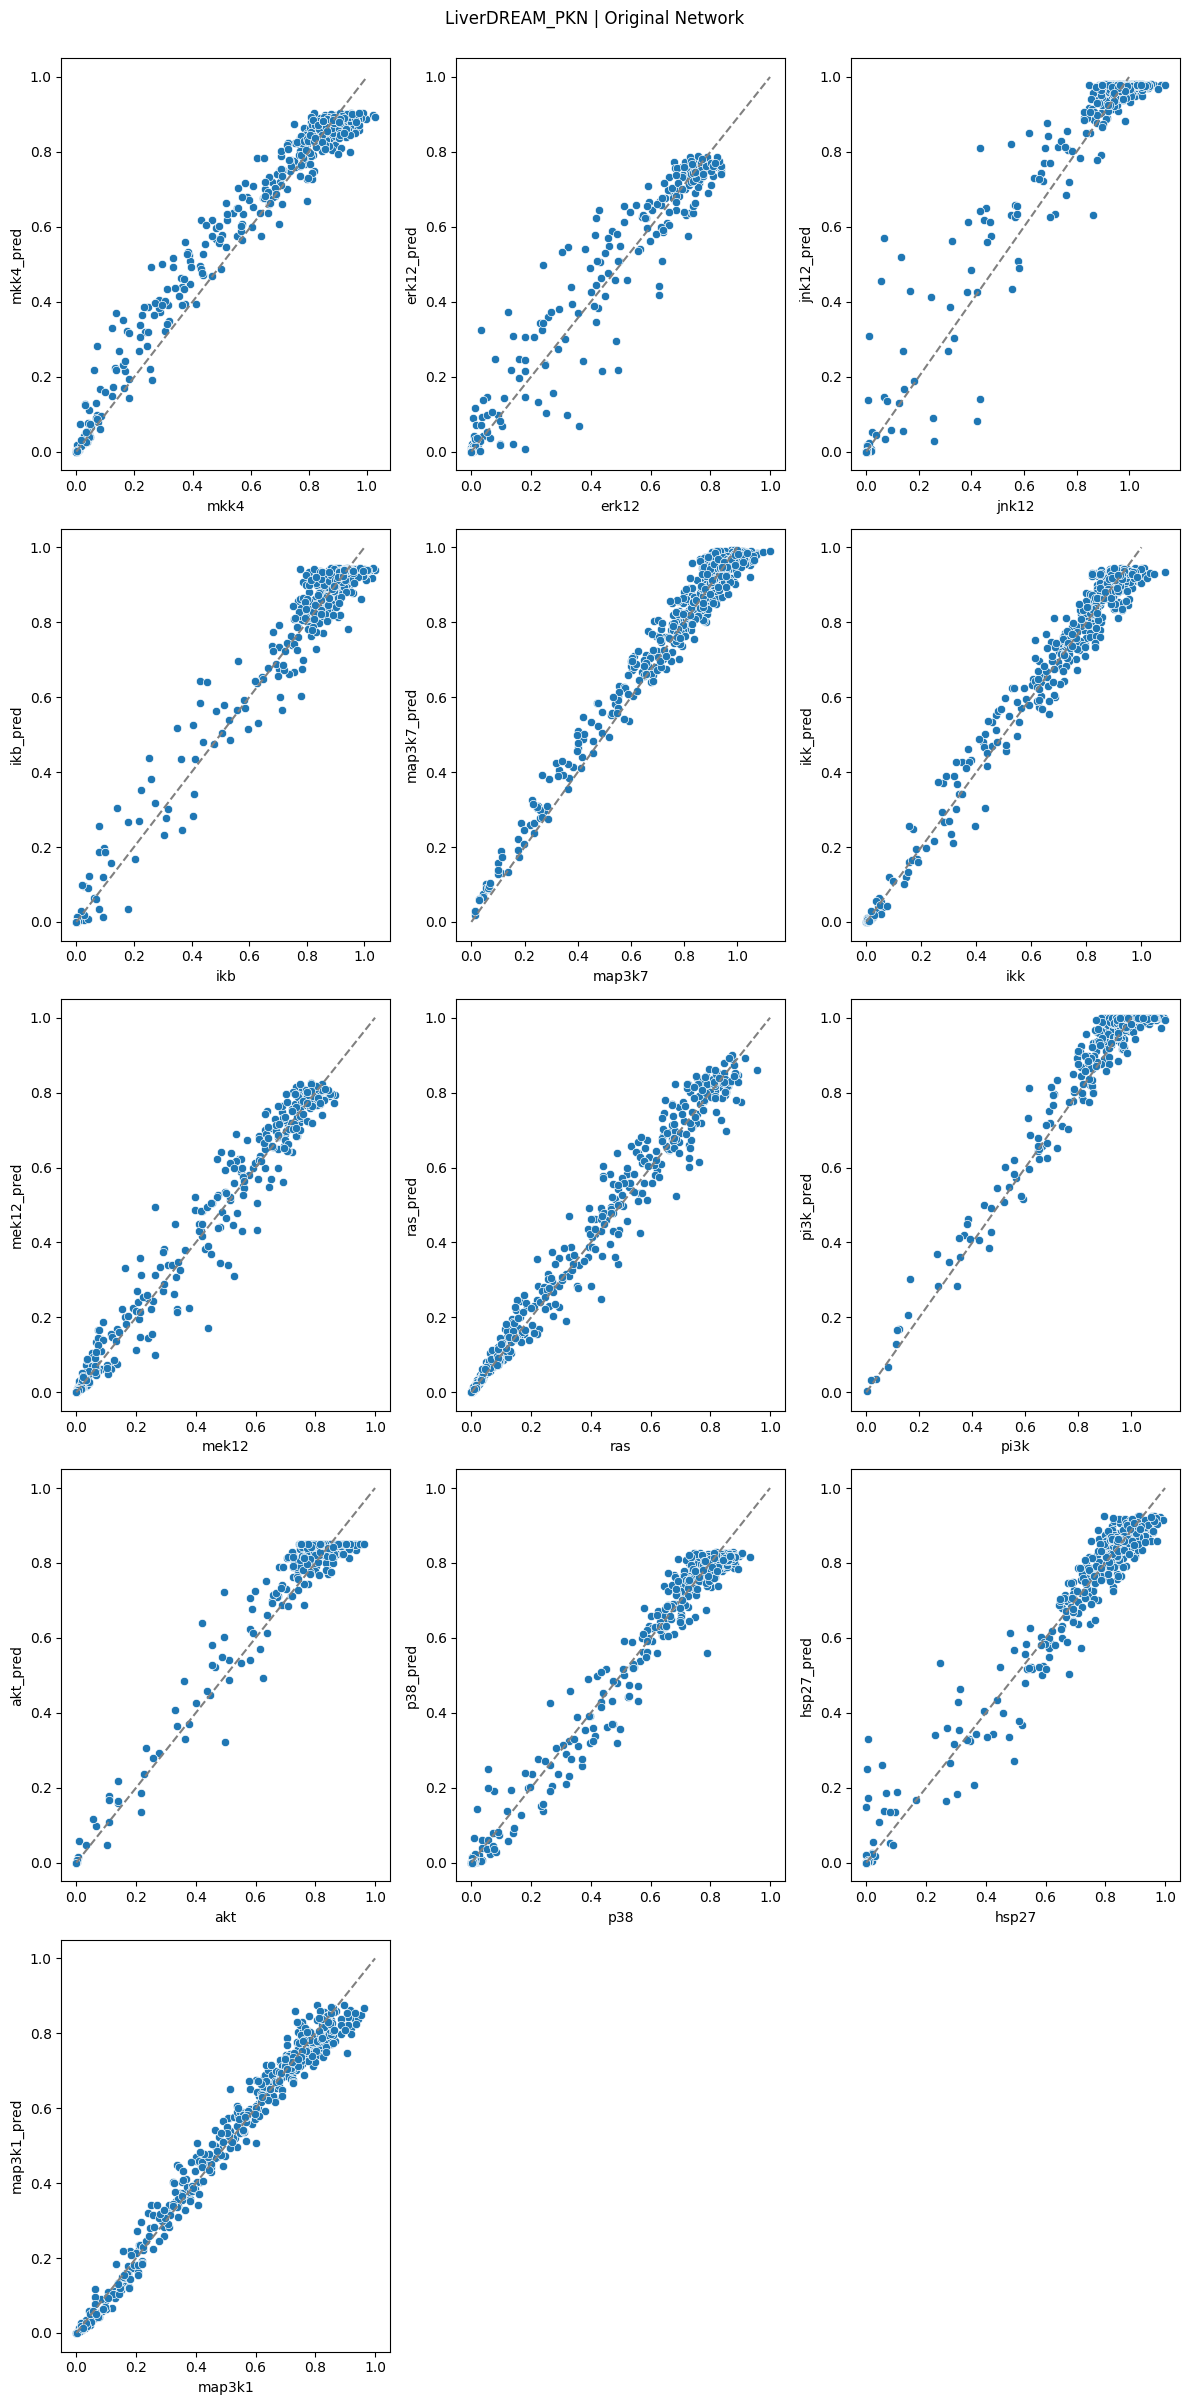

In [24]:
pred_nodes = list(set(bfn.biological_nodes)-set(bfn.root_nodes))

fig,axs = plt.subplots(nrows=5,ncols=3)
axs=axs.flatten()                   
for i in range(15):
    ax=axs[i]
    try:
        n = pred_nodes[i]
        sns.lineplot(x=[0,1],y=[0,1],c='gray',ls='--',ax=ax)    
        sns.scatterplot(test_predictions,x=n,y=f'{n}_pred',ax=ax)
    except IndexError:
        ax.remove()
fig.set_size_inches(12,24)
fig.suptitle("LiverDREAM_PKN | Original Network",y=1.0)
fig.tight_layout()
fig.savefig("normal_liverdream_student_fit.png",dpi=300)
plt.show()

# Train a model with shuffled nodes

In [25]:
for i in range(nrep):
    mlflow.start_run()
    mlflow.log_param("version","shuffled")
    shuffled_bfn = create_shuffled_subclass(DREAMBioFuzzNet)(nodes=nodes,edges=edges)    
    out_data = shuffled_bfn.conduct_optimisation(
        epochs=10,
        batch_size=64,
        learning_rate=0.01,
        logger=mlflow,
        **optim_data
    )
    mlflow.end_run()

Loss=?.??e??:   0%|          | 0/10 [00:00<?, ?it/s]

batch:   0%|          | 0/56 [00:00<?, ?it/s]

batch:   0%|          | 0/56 [00:00<?, ?it/s]

batch:   0%|          | 0/56 [00:00<?, ?it/s]

batch:   0%|          | 0/56 [00:00<?, ?it/s]

batch:   0%|          | 0/56 [00:00<?, ?it/s]

batch:   0%|          | 0/56 [00:00<?, ?it/s]

batch:   0%|          | 0/56 [00:00<?, ?it/s]

batch:   0%|          | 0/56 [00:00<?, ?it/s]

batch:   0%|          | 0/56 [00:00<?, ?it/s]

batch:   0%|          | 0/56 [00:00<?, ?it/s]

Loss=?.??e??:   0%|          | 0/10 [00:00<?, ?it/s]

batch:   0%|          | 0/56 [00:00<?, ?it/s]

batch:   0%|          | 0/56 [00:00<?, ?it/s]

batch:   0%|          | 0/56 [00:00<?, ?it/s]

batch:   0%|          | 0/56 [00:00<?, ?it/s]

batch:   0%|          | 0/56 [00:00<?, ?it/s]

batch:   0%|          | 0/56 [00:00<?, ?it/s]

batch:   0%|          | 0/56 [00:00<?, ?it/s]

batch:   0%|          | 0/56 [00:00<?, ?it/s]

batch:   0%|          | 0/56 [00:00<?, ?it/s]

batch:   0%|          | 0/56 [00:00<?, ?it/s]

Loss=?.??e??:   0%|          | 0/10 [00:00<?, ?it/s]

batch:   0%|          | 0/56 [00:00<?, ?it/s]

batch:   0%|          | 0/56 [00:00<?, ?it/s]

batch:   0%|          | 0/56 [00:00<?, ?it/s]

batch:   0%|          | 0/56 [00:00<?, ?it/s]

batch:   0%|          | 0/56 [00:00<?, ?it/s]

batch:   0%|          | 0/56 [00:00<?, ?it/s]

batch:   0%|          | 0/56 [00:00<?, ?it/s]

batch:   0%|          | 0/56 [00:00<?, ?it/s]

batch:   0%|          | 0/56 [00:00<?, ?it/s]

batch:   0%|          | 0/56 [00:00<?, ?it/s]

Loss=?.??e??:   0%|          | 0/10 [00:00<?, ?it/s]

batch:   0%|          | 0/56 [00:00<?, ?it/s]

batch:   0%|          | 0/56 [00:00<?, ?it/s]

batch:   0%|          | 0/56 [00:00<?, ?it/s]

batch:   0%|          | 0/56 [00:00<?, ?it/s]

batch:   0%|          | 0/56 [00:00<?, ?it/s]

batch:   0%|          | 0/56 [00:00<?, ?it/s]

batch:   0%|          | 0/56 [00:00<?, ?it/s]

batch:   0%|          | 0/56 [00:00<?, ?it/s]

batch:   0%|          | 0/56 [00:00<?, ?it/s]

batch:   0%|          | 0/56 [00:00<?, ?it/s]

Loss=?.??e??:   0%|          | 0/10 [00:00<?, ?it/s]

batch:   0%|          | 0/56 [00:00<?, ?it/s]

batch:   0%|          | 0/56 [00:00<?, ?it/s]

batch:   0%|          | 0/56 [00:00<?, ?it/s]

batch:   0%|          | 0/56 [00:00<?, ?it/s]

batch:   0%|          | 0/56 [00:00<?, ?it/s]

batch:   0%|          | 0/56 [00:00<?, ?it/s]

batch:   0%|          | 0/56 [00:00<?, ?it/s]

batch:   0%|          | 0/56 [00:00<?, ?it/s]

batch:   0%|          | 0/56 [00:00<?, ?it/s]

batch:   0%|          | 0/56 [00:00<?, ?it/s]

Loss=?.??e??:   0%|          | 0/10 [00:00<?, ?it/s]

batch:   0%|          | 0/56 [00:00<?, ?it/s]

batch:   0%|          | 0/56 [00:00<?, ?it/s]

batch:   0%|          | 0/56 [00:00<?, ?it/s]

batch:   0%|          | 0/56 [00:00<?, ?it/s]

batch:   0%|          | 0/56 [00:00<?, ?it/s]

batch:   0%|          | 0/56 [00:00<?, ?it/s]

batch:   0%|          | 0/56 [00:00<?, ?it/s]

batch:   0%|          | 0/56 [00:00<?, ?it/s]

batch:   0%|          | 0/56 [00:00<?, ?it/s]

batch:   0%|          | 0/56 [00:00<?, ?it/s]

Loss=?.??e??:   0%|          | 0/10 [00:00<?, ?it/s]

batch:   0%|          | 0/56 [00:00<?, ?it/s]

batch:   0%|          | 0/56 [00:00<?, ?it/s]

batch:   0%|          | 0/56 [00:00<?, ?it/s]

batch:   0%|          | 0/56 [00:00<?, ?it/s]

batch:   0%|          | 0/56 [00:00<?, ?it/s]

batch:   0%|          | 0/56 [00:00<?, ?it/s]

batch:   0%|          | 0/56 [00:00<?, ?it/s]

batch:   0%|          | 0/56 [00:00<?, ?it/s]

batch:   0%|          | 0/56 [00:00<?, ?it/s]

batch:   0%|          | 0/56 [00:00<?, ?it/s]

Loss=?.??e??:   0%|          | 0/10 [00:00<?, ?it/s]

batch:   0%|          | 0/56 [00:00<?, ?it/s]

batch:   0%|          | 0/56 [00:00<?, ?it/s]

batch:   0%|          | 0/56 [00:00<?, ?it/s]

batch:   0%|          | 0/56 [00:00<?, ?it/s]

batch:   0%|          | 0/56 [00:00<?, ?it/s]

batch:   0%|          | 0/56 [00:00<?, ?it/s]

batch:   0%|          | 0/56 [00:00<?, ?it/s]

batch:   0%|          | 0/56 [00:00<?, ?it/s]

batch:   0%|          | 0/56 [00:00<?, ?it/s]

batch:   0%|          | 0/56 [00:00<?, ?it/s]

Loss=?.??e??:   0%|          | 0/10 [00:00<?, ?it/s]

batch:   0%|          | 0/56 [00:00<?, ?it/s]

batch:   0%|          | 0/56 [00:00<?, ?it/s]

batch:   0%|          | 0/56 [00:00<?, ?it/s]

batch:   0%|          | 0/56 [00:00<?, ?it/s]

batch:   0%|          | 0/56 [00:00<?, ?it/s]

batch:   0%|          | 0/56 [00:00<?, ?it/s]

batch:   0%|          | 0/56 [00:00<?, ?it/s]

batch:   0%|          | 0/56 [00:00<?, ?it/s]

batch:   0%|          | 0/56 [00:00<?, ?it/s]

batch:   0%|          | 0/56 [00:00<?, ?it/s]

Loss=?.??e??:   0%|          | 0/10 [00:00<?, ?it/s]

batch:   0%|          | 0/56 [00:00<?, ?it/s]

batch:   0%|          | 0/56 [00:00<?, ?it/s]

batch:   0%|          | 0/56 [00:00<?, ?it/s]

batch:   0%|          | 0/56 [00:00<?, ?it/s]

batch:   0%|          | 0/56 [00:00<?, ?it/s]

batch:   0%|          | 0/56 [00:00<?, ?it/s]

batch:   0%|          | 0/56 [00:00<?, ?it/s]

batch:   0%|          | 0/56 [00:00<?, ?it/s]

batch:   0%|          | 0/56 [00:00<?, ?it/s]

batch:   0%|          | 0/56 [00:00<?, ?it/s]

In [26]:
with torch.no_grad():
    shuffled_bfn.initialise_random_truth_and_output(n_test)
    shuffled_bfn.set_network_ground_truth(test_gt)
    shuffled_bfn.sequential_update(input_nodes=bfn.root_nodes, inhibition=test_inh)

In [27]:
data = {}
for n in bfn.biological_nodes:
    if n not in shuffled_bfn.root_nodes:
        data[f"{n}_pred"]=shuffled_bfn.nodes[n]['output_state'].numpy()
    data[n]=shuffled_bfn.nodes[n]['ground_truth'].numpy()
test_predictions_shuffled = pd.DataFrame(data)

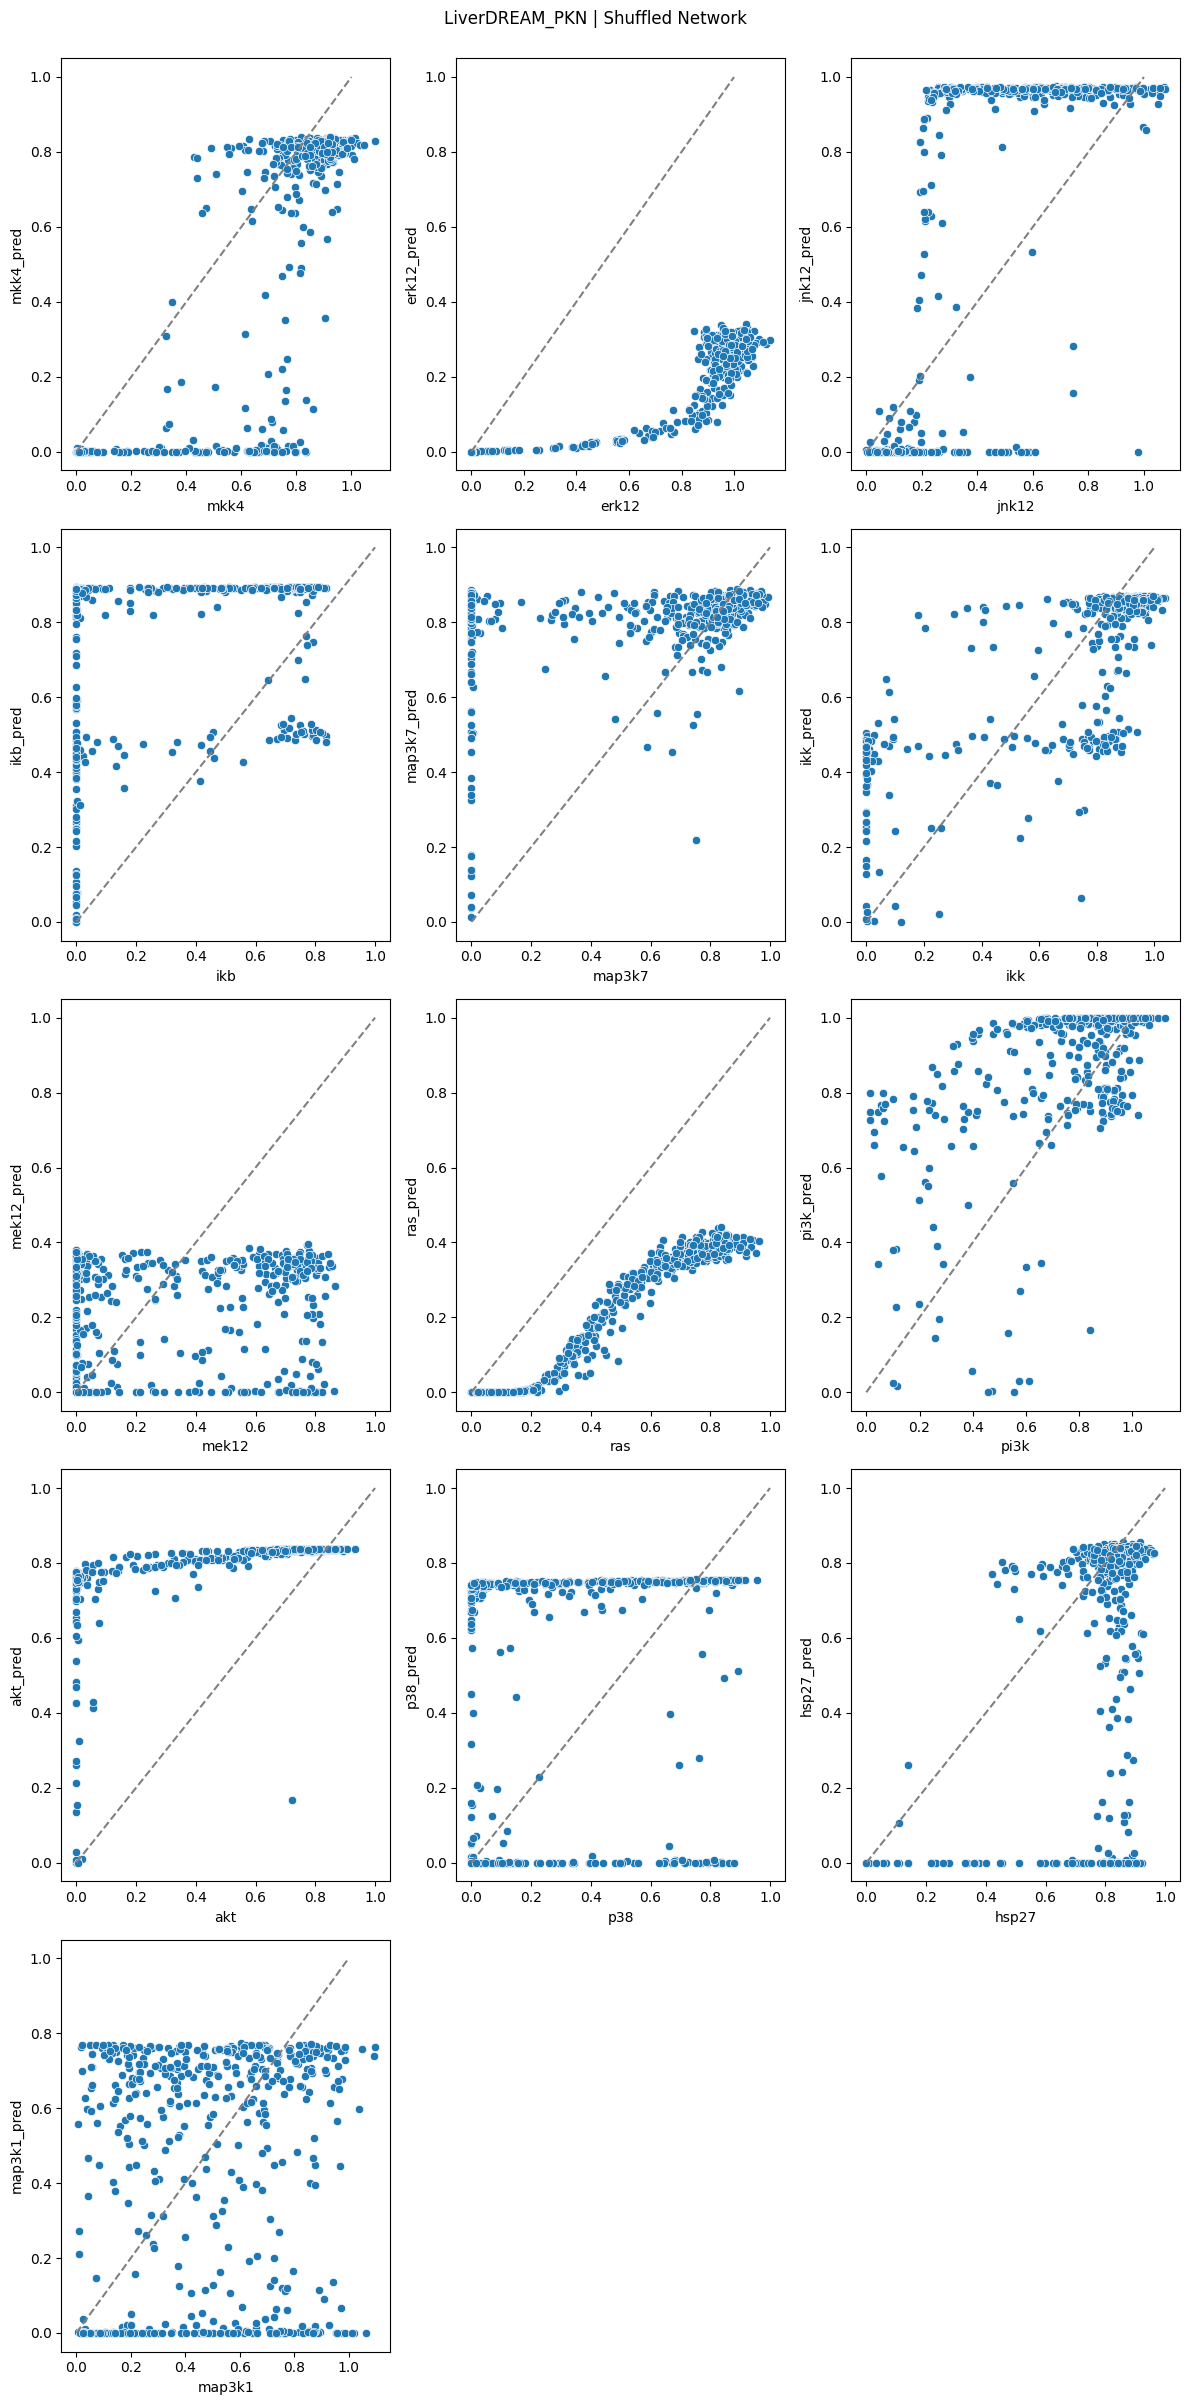

In [28]:
pred_nodes = list(set(shuffled_bfn.biological_nodes)-set(shuffled_bfn.root_nodes))

fig,axs = plt.subplots(nrows=5,ncols=3)
axs=axs.flatten()                   
for i in range(15):
    ax=axs[i]
    try:
        n = pred_nodes[i]
        sns.lineplot(x=[0,1],y=[0,1],c='gray',ls='--',ax=ax)    
        sns.scatterplot(test_predictions_shuffled,x=n,y=f'{n}_pred',ax=ax)
    except IndexError:
        ax.remove()
fig.suptitle("LiverDREAM_PKN | Shuffled Network",y=1.0)        
fig.set_size_inches(12,24)
fig.tight_layout()
fig.savefig("shuffled_liverdream_student_fit.png",dpi=300)
plt.show()